# Get to know the data

In [1]:
with open('conversion_data.csv') as f:
    for num, line in enumerate(f):
        if num > 5:
            break
        print (num, line)

0 "country","age","new_user","source","total_pages_visited","converted"

1 "UK",25,1,"Ads",1,0

2 "US",23,1,"Seo",5,0

3 "US",28,1,"Seo",4,0

4 "China",39,1,"Seo",5,0

5 "US",30,1,"Seo",6,0



In [2]:
import pandas as pd

df = pd.read_csv('conversion_data.csv')
df.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [3]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
df[df.age>70]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
154217,US,73,1,Seo,5,0
192644,US,77,0,Direct,4,0
208969,US,72,1,Direct,4,0
265167,US,79,1,Direct,1,0
295581,UK,111,0,Ads,10,1


In [5]:
df[df.age<20]

,country,age,new_user,source,total_pages_visited,converted
28,Germany,17,0,Seo,1,0
39,UK,18,1,Ads,14,0
40,US,17,0,Seo,1,0
47,China,19,1,Direct,2,0
53,US,17,1,Seo,7,0
70,US,19,1,Ads,3,0
82,US,18,0,Seo,6,0
87,US,18,0,Direct,19,1
92,Germany,19,1,Direct,5,0
101,China,18,1,Ads,3,0


# Exploratory data analysis

In [6]:
from bokeh.charts import Histogram, output_notebook, show
output_notebook()
p = Histogram(df['age'], bins=30, title="Age Distribution (30 bins)")
show(p)

BokehJS successfully loaded.

In [7]:
# Remove "strange" records
df = df[df.age<80]
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [8]:
from bokeh.charts import Bar, output_notebook, show
output_notebook()
p = Bar(df, 'country', values='converted', agg='mean', title="Conversion Rate by Country")
show(p)

BokehJS successfully loaded.

In [9]:
import numpy as np
grouped = df.loc[:, ['country', 'converted']].groupby('country')

date_country = grouped.mean()
date_country.index
#grouped.groups
#grouped.sum()
# data_pages = grouped.aggregate(np.mean)
# data_pages

Index(['China', 'Germany', 'UK', 'US'], dtype='object', name='country')

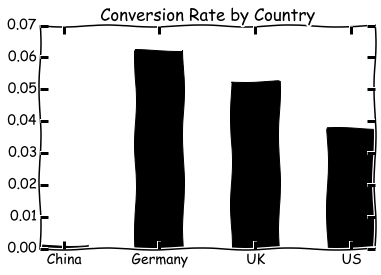

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

ind = np.arange(len(df.country.unique()))
width = 0.5
plt.xkcd()
# fig = plt.figure()
fig, ax = plt.subplots()
ax.bar(ind, date_country.converted, width, color="black")

ax.set_title("Conversion Rate by Country")
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(date_country.index)

In [11]:
from bokeh.charts import Bar, output_notebook, show
output_notebook()
p = Bar(df, 'source', values='converted', agg='mean', color="wheat", title="Conversion Rate by Source")
show(p)

BokehJS successfully loaded.

In [12]:
from bokeh.charts import Bar, output_notebook, show
output_notebook()
p = Bar(df, 'new_user', values='converted', agg='mean', color="green", title="Conversion Rate by New User")
show(p)

BokehJS successfully loaded.

In [13]:
grouped = df.loc[:, ['age', 'converted']].groupby('age')
data_age = grouped.mean()
data_age["Age"] = data_age.index
# data_age
from bokeh.charts import Line, output_notebook, show
output_notebook()
p = Line(data_age, x='Age', y='converted', color="blue", title="Conversion Rate by Age",
       plot_width=900, plot_height=400)
show(p)

BokehJS successfully loaded.

In [14]:
grouped = df.loc[:, ['total_pages_visited', 'converted']].groupby('total_pages_visited')

#grouped.groups
#grouped.sum()
data_pages = grouped.aggregate(np.mean)
data_pages

,converted
total_pages_visited,
1,0.000000
2,0.000228
3,0.000251
4,0.000780
5,0.001570
6,0.003437
7,0.006769
8,0.015238
9,0.033067


In [15]:
from bokeh.charts import Line, output_notebook
output_notebook()
p = Line(data_pages, title="Conversion Rate vs Total Pages Visited", legend="top_left", ylabel="Conversion Rate")
show(p)

BokehJS successfully loaded.

# Machine Learning

In [16]:
# from sklearn import preprocessing
# le_country = preprocessing.LabelEncoder()
# le_country.fit(df['country'])
# print (list(le_country.classes_))
# df['country_encoded'] = le_country.transform(df['country'])

# le_source = preprocessing.LabelEncoder()
# le_source.fit(df['source'])
# print (list(le_source.classes_))
# df['source_encoded'] = le_source.transform(df['source'])

country_encoded, country_index = pd.factorize(df['country'])
df['country_encoded'] = country_encoded

source_encoded, source_index = pd.factorize(df['source'])
df['source_encoded'] = source_encoded

df.head()

,country,age,new_user,source,total_pages_visited,converted,country_encoded,source_encoded
0,UK,25,1,Ads,1,0,0,0
1,US,23,1,Seo,5,0,1,1
2,US,28,1,Seo,4,0,1,1
3,China,39,1,Seo,5,0,2,1
4,US,30,1,Seo,6,0,1,1


In [17]:
from sklearn.cross_validation import train_test_split
# split 80/20 train-test
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, ['country_encoded', 'age', 'new_user', 'source_encoded', 'total_pages_visited']],
                                                    df.converted,
                                                    test_size=0.2,
                                                    random_state=1)
x_train.columns

Index(['country_encoded', 'age', 'new_user', 'source_encoded',
       'total_pages_visited'],
      dtype='object')

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, oob_score=True)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [19]:
clf.oob_score_

0.98453498209188872

In [20]:
clf.n_features_

5

In [21]:
importance = pd.DataFrame({"feature": pd.Categorical(x_train.columns), "importance": clf.feature_importances_})

from bokeh.charts import Bar, output_notebook, show
output_notebook()
p = Bar(importance, label="feature", values="importance", color="orange", title="Feature importance")
show(p)

BokehJS successfully loaded.

In [22]:
preds = clf.predict(x_test)

In [23]:
pd.crosstab(y_test, preds, rownames=['actual'], colnames=['preds'])

preds,0,1
actual,,
0,60887,323
1,646,1384


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [25]:
print ("Accuracy:", accuracy_score(y_test, preds) )
print ("Confusion Matrix:\n", confusion_matrix(y_test, preds) )

Accuracy: 0.984677419355
Confusion Matrix:
 [[60887   323]
 [  646  1384]]


In [26]:
fpr, tpr, thresholds = roc_curve(y_test, preds)

In [27]:
fpr

array([ 0.        ,  0.00527692,  1.        ])

In [28]:
tpr

array([ 0.       ,  0.6817734,  1.       ])

In [29]:
thresholds

array([2, 1, 0])

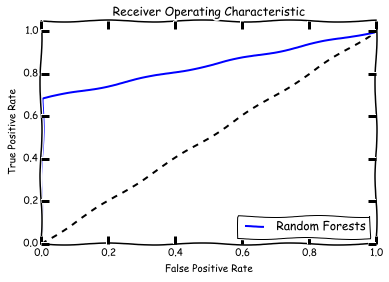

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forests')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [31]:
auc(fpr, tpr)

0.83824824173905066

In [32]:
from bokeh.plotting import figure, show, output_notebook

output_notebook()

p = figure(title="Receiver Operating Characteristic",
           y_range=(0.0, 1.05))

p.line(fpr, tpr, legend="Random Forests")

show(p)

BokehJS successfully loaded.

//anaconda/lib/python3.4/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/lib/python3.4/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/lib/python3.4/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/lib/python3.4/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//an

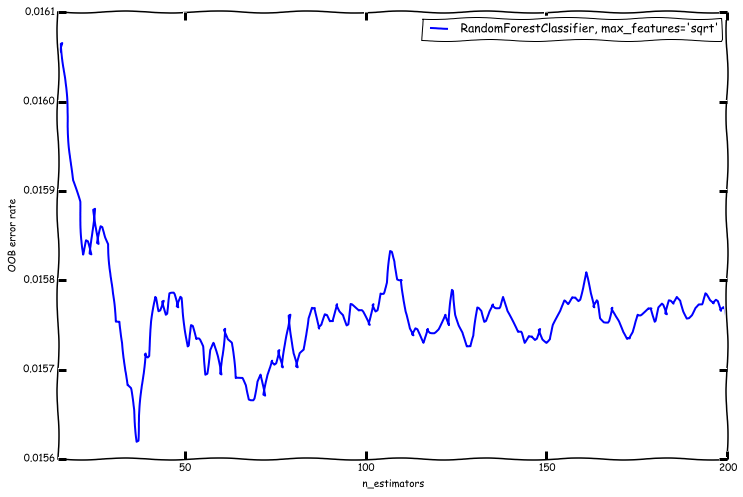

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.cross_validation import train_test_split

plt.figure(1, figsize=(12, 8))

RANDOM_STATE = 123
NTREES = 100

# split 80/20 train-test
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, ['country_encoded', 
                                                               'age', 
                                                               'new_user', 
                                                               'source_encoded', 
                                                               'total_pages_visited']],
                                                    df.converted,
                                                    test_size=0.2,
                                                    random_state=RANDOM_STATE)

ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, n_estimators=NTREES, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
# plt.show()

## Plot OOB Error for multiple types of random forests

//anaconda/lib/python3.4/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/lib/python3.4/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/lib/python3.4/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/lib/python3.4/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//an

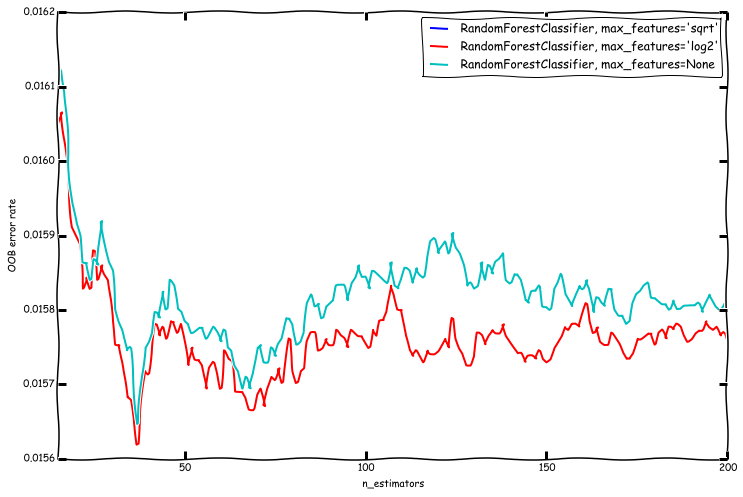

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.cross_validation import train_test_split

plt.figure(1, figsize=(12, 8))

RANDOM_STATE = 123
NTREES = 100

# split 80/20 train-test
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, ['country_encoded', 
                                                               'age', 
                                                               'new_user', 
                                                               'source_encoded', 
                                                               'total_pages_visited']],
                                                    df.converted,
                                                    test_size=0.2,
                                                    random_state=RANDOM_STATE)

ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, n_estimators=NTREES, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, n_estimators=NTREES, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, n_estimators=NTREES, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
# plt.show()

## Removing total_page_viewed

In [36]:
# from sklearn.ensemble import RandomForestClassifier

# features = df.columns[[6,1,2,7]]
# list(features)

from sklearn.cross_validation import train_test_split
# split 80/20 train-test
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, ['country_encoded', 'age', 'new_user', 'source_encoded']],
                                                    df.converted,
                                                    test_size=0.2,
                                                    random_state=1)
x_train.columns

Index(['country_encoded', 'age', 'new_user', 'source_encoded'], dtype='object')

In [37]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
importance = pd.DataFrame({"feature": pd.Categorical(x_train.columns), "importance": clf.feature_importances_})

from bokeh.charts import Bar, output_notebook, show
output_notebook()
p = Bar(importance, label="feature", values="importance", color="gray", title="Feature importance")
show(p)

BokehJS successfully loaded.

In [39]:
preds = clf.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [41]:
print ("Accuracy:", accuracy_score(y_test, preds) )
print ("Confusion Matrix:\n", confusion_matrix(y_test, preds) )

Accuracy: 0.967900063251
Confusion Matrix:
 [[61210     0]
 [ 2030     0]]


In [42]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(clf, x_test, y_test)
scores.mean() 

0.96742567915026678